## 295 - 2 Minutes to Plotting Major Cities on Your Python Maps

[Youtube](https://www.youtube.com/watch?v=K9R5Wd2LRd8)

[simplemaps - Interactive States Cities and Database](https://simplemaps.com/data/us-cities)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
df = pd.read_csv('uscities.csv')
df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18972871,10768.2,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12121244,3267.6,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8595181,4576.6,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,5711945,4945.7,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5668165,1522.2,shape,False,True,America/Chicago,1,75287 75098 75234 75254 75251 75252 75253 7503...,1840019440


In [3]:
len(df)

30844

In [4]:
df_large = df[df['population'] >= 250000]

In [5]:
len(df_large)

183

In [6]:
crs = ccrs.LambertConformal(central_longitude = -100, central_latitude = 45)

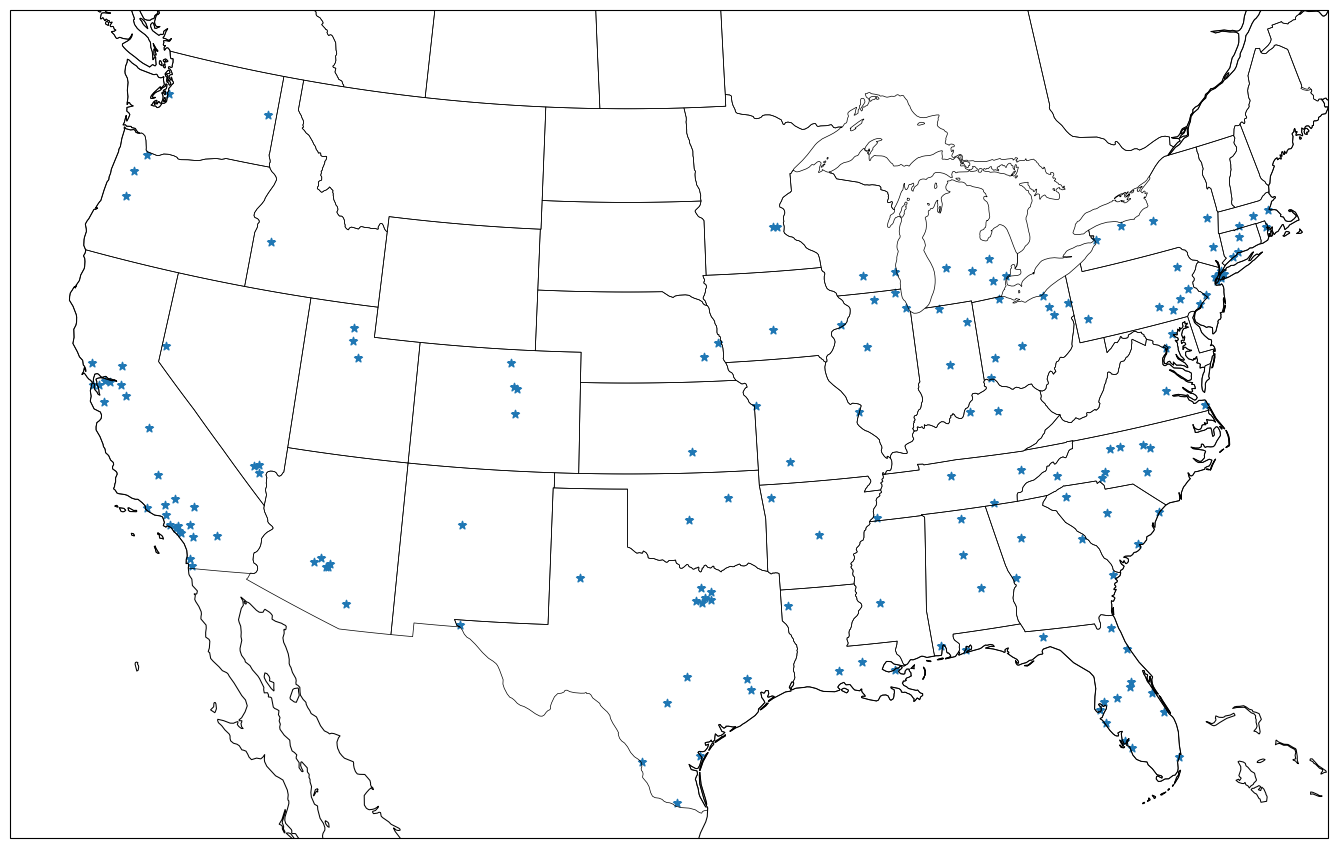

In [7]:
fig = plt.figure(figsize = (17, 12))
ax = fig.add_subplot(1, 1, 1, projection = crs)
ax.set_extent((-122, -75, 25, 50), crs = ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)

for _, city in df_large.iterrows():
	ax.scatter(city['lng'], city['lat'], transform = ccrs.PlateCarree(), color = 'tab:blue', marker = "*")

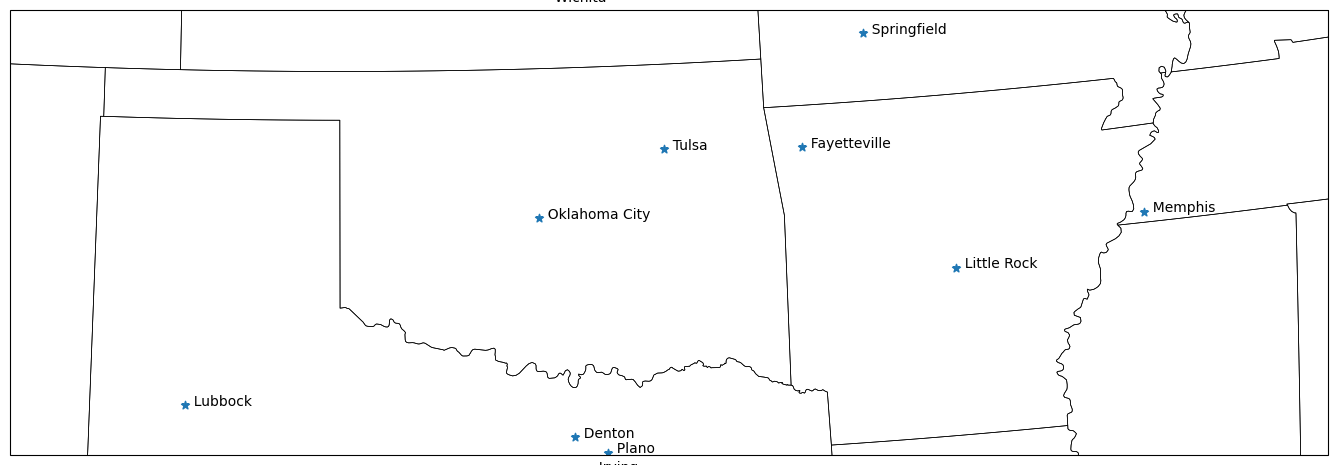

In [8]:
fig = plt.figure(figsize = (17, 12))
ax = fig.add_subplot(1, 1, 1, projection = crs)
ax.set_extent((-104, -88, 33, 37), crs = ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)

for _, city in df_large.iterrows():
	ax.scatter(city['lng'], city['lat'], transform = ccrs.PlateCarree(), color = 'tab:blue', marker = "*")
	ax.text(city['lng'], city['lat'], '  ' + city['city_ascii'], transform = ccrs.PlateCarree(), clip_on = True)